### **PHASE 1 — Data Understanding & Scope Definition**


#### **1. Dataset Overview**

The dataset contains retail transaction records with 11 features such as product details, pricing, quantities, customer IDs, discounts, and transaction timestamps. The data is intentionally dirty and contains missing values, inconsistent formats, and potential calculation errors, making it ideal for demonstrating data cleaning, preprocessing, and exploratory analysis.

#### **2. Initial Observations**
**Data Types**

- Transaction Date stored as string → needs conversion

- Discount Applied contains True/False/NaN → needs normalization

- Numeric columns (Price Per Unit, Quantity, Total Spent) contain missing values

**Missing Values**

- Item: 1213 missing
- Price Per Unit: 609 missing
- Quantity: 604 missing
- Total Spent: 604 missing
- Discount Applied: 4199 missing

**Data Quality Issues Identified**

- Inconsistent date formats (12/09/2022, 2022-09-18, 16-09-2022)

- Missing or incorrect amounts for price/quantity/total spent

- “Total Spent” may not always match Quantity × Price Per Unit

- Missing discount values

- Potential inconsistencies in item/category naming

### **3. Business Questions to Answer**

This project aims to analyze sales performance and customer behavior. Key business questions include:

**Sales Performance**

1. Which products and categories generate the highest revenue?

2. Which store locations perform the best?

3. How do sales vary across days, weeks, and months?

**Customer Behavior**

4. Which customer segments spend the most (age groups, genders, etc.)?

5. What is the average transaction value?

6. Are certain customer groups more responsive to discounts?

**Operational Insights**

7. Which payment methods are most commonly used?

8. What are the peak transaction hours or days?

**Discount Effectiveness**

9. Do discounts lead to increased sales volume or higher total revenue?

### **4. Project Scope**
**In-Scope**

- Data cleaning & preprocessing

- Handling missing and inconsistent values

- Standardizing date formats and categories

- Validating transaction amounts

- Feature engineering (day of week, month, net revenue, discount effects)

- Exploratory Data Analysis

- Generating key business insights

- Building a Power BI / Tableau dashboard

- Preparing final insights & recommendations

**Out-of-Scope**

- Predictive modeling / machine learning

- Real-time analytics

- External data source integration

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


#### **Importing Data**

In [33]:
path = r'D:\Retail-Sales-Performance-&-Customer-Behavior-Analysis\Data\raw\retail_store_sales.csv'
df = pd.read_csv(path)
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,08-04-2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,23-07-2023,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,05-10-2022,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,07-05-2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,02-10-2022,False


In [34]:
df.shape

(12575, 11)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [36]:
df.describe(include='all')

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
count,12575,12575,12575,11362,11966.000000,11971.000000,11971.000000,12575,12575,12575,8376
unique,12575,25,8,200,NaN,NaN,NaN,3,2,1114,2
top,TXN_6867343,CUST_05,Furniture,Item_2_BEV,NaN,NaN,NaN,Cash,Online,30-05-2022,True
freq,1,544,1591,126,NaN,NaN,NaN,4310,6354,26,4219
mean,NaN,NaN,NaN,NaN,23.365912,5.536380,129.652577,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,10.743519,2.857883,94.750697,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,1.000000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,14.000000,3.000000,51.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,23.000000,6.000000,108.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,33.500000,8.000000,192.000000,NaN,NaN,NaN,NaN


### Step 2: Understand Dataset Columns
Let's review each column for business meaning, expected data type, and possible issues.

In [37]:
# List columns and their types
print(df.columns)
print(df.dtypes)

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')
Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object


In [38]:
# Check for missing values in each column
print(df.isnull().sum())

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64


In [39]:
# Show unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f'Unique values in {col}:', df[col].unique())
    print('--------------------------------------------------------')

Unique values in Transaction ID: ['TXN_6867343' 'TXN_3731986' 'TXN_9303719' ... 'TXN_5306010' 'TXN_5167298'
 'TXN_2407494']
--------------------------------------------------------
Unique values in Customer ID: ['CUST_09' 'CUST_22' 'CUST_02' 'CUST_06' 'CUST_05' 'CUST_07' 'CUST_21'
 'CUST_23' 'CUST_25' 'CUST_14' 'CUST_15' 'CUST_17' 'CUST_01' 'CUST_10'
 'CUST_04' 'CUST_13' 'CUST_18' 'CUST_08' 'CUST_20' 'CUST_12' 'CUST_11'
 'CUST_19' 'CUST_16' 'CUST_24' 'CUST_03']
--------------------------------------------------------
Unique values in Category: ['Patisserie' 'Milk Products' 'Butchers' 'Beverages' 'Food' 'Furniture'
 'Electric household essentials' 'Computers and electric accessories']
--------------------------------------------------------
Unique values in Item: ['Item_10_PAT' 'Item_17_MILK' 'Item_12_BUT' 'Item_16_BEV' 'Item_6_FOOD'
 nan 'Item_1_FOOD' 'Item_16_FUR' 'Item_22_BUT' 'Item_3_BUT' 'Item_2_FOOD'
 'Item_24_PAT' 'Item_16_MILK' 'Item_17_PAT' 'Item_13_EHE' 'Item_7_BEV'
 'Item_4_E

In [40]:
# Check for outliers and impossible values in numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    print(f'{col} min:', df[col].min(), '| max:', df[col].max())

Price Per Unit min: 5.0 | max: 41.0
Quantity min: 1.0 | max: 10.0
Total Spent min: 5.0 | max: 410.0


In [41]:
# Check if 'Total Spent' matches 'Quantity * Price per Unit' (if columns exist)
if 'Total Spent' in df.columns and 'Quantity' in df.columns and 'Price per Unit' in df.columns:
    mismatch = df[df['Total Spent'] != df['Quantity'] * df['Price per Unit']]
    print('Rows with mismatched Total Spent:', mismatch.shape[0])

### **PHASE 2 — Data Cleaning & Preprocessing**

1. Handle Missing Values

In [42]:
# Fill missing item names
df['Item'] = df['Item'].fillna("Unknown Item")

# Fix relationships between Price, Quantity, Total
def fix_transaction(row):
    price = row['Price Per Unit']
    qty = row['Quantity']
    total = row['Total Spent']
    
    # Case 1: Total missing but price & qty exist
    if pd.notnull(price) and pd.notnull(qty) and pd.isnull(total):
        row['Total Spent'] = price * qty
    
    # Case 2: Price missing but total & qty exist
    if pd.isnull(price) and pd.notnull(qty) and pd.notnull(total):
        row['Price Per Unit'] = total / qty
        
    # Case 3: Quantity missing but price & total exist
    if pd.notnull(price) and pd.isnull(qty) and pd.notnull(total):
        row['Quantity'] = total / price
        
    return row

df = df.apply(fix_transaction, axis=1)

# If 2 or more values missing → drop the row
df = df.dropna(subset=['Price Per Unit', 'Quantity', 'Total Spent'], thresh=2)


In [43]:
# (Optional) Reset index after dropping rows for cleanliness
df = df.reset_index(drop=True)

print(df[['Item', 'Price Per Unit', 'Quantity', 'Total Spent']].isnull().sum())

df.head()

Item              0
Price Per Unit    0
Quantity          0
Total Spent       0
dtype: int64


Item              0
Price Per Unit    0
Quantity          0
Total Spent       0
dtype: int64


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,08-04-2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,23-07-2023,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,05-10-2022,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,07-05-2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,02-10-2022,False


2. Convert and Standardize Transaction Date

In [44]:
import pandas as pd

# Try parsing with multiple common date formats
def parse_date(date_str):
    for fmt in ("%d/%m/%Y", "%Y-%m-%d", "%d-%m-%Y", "%Y/%m/%d"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT

df['Transaction Date'] = df['Transaction Date'].apply(parse_date)

# Optionally, print how many are still missing
print("Unparseable dates:", df['Transaction Date'].isnull().sum())

# Now, you can decide: drop only if absolutely necessary
df = df.dropna(subset=['Transaction Date'])

Unparseable dates: 0


3. Validate Numeric Columns

In [45]:
df['calc_total'] = df['Price Per Unit'] * df['Quantity']

df['diff'] = abs(df['calc_total'] - df['Total Spent'])

# If difference > 1 unit → remove
df = df[df['diff'] <= 1]

df = df.drop(columns=['calc_total', 'diff'])


4. Clean & Standardize Categorical Columns

In [46]:
df['Payment Method'] = df['Payment Method'].str.lower().str.strip()

df['Payment Method'] = df['Payment Method'].replace({
    'cc': 'credit card',
    'creditcard': 'credit card',
    'card': 'credit card',
    'cash ': 'cash',
    'debit card': 'debit card'
})


In [47]:
df['Location'] = df['Location'].str.strip().str.title()


5. Clean Discount Applied Column

In [48]:
df['Discount Applied'] = df['Discount Applied'].fillna(False).infer_objects()
df['Discount Applied'] = df['Discount Applied'].astype(bool)


C:\Users\moksh\AppData\Local\Temp\ipykernel_25084\2858304592.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Discount Applied'] = df['Discount Applied'].fillna(False).infer_objects()


6. Final Validation

In [49]:
df.isnull().sum()


Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11971 entries, 0 to 11970
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    11971 non-null  object        
 1   Customer ID       11971 non-null  object        
 2   Category          11971 non-null  object        
 3   Item              11971 non-null  object        
 4   Price Per Unit    11971 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    11971 non-null  object        
 8   Location          11971 non-null  object        
 9   Transaction Date  11971 non-null  datetime64[ns]
 10  Discount Applied  11971 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(6)
memory usage: 947.1+ KB


In [51]:
df.head()


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,digital wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,digital wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,credit card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,credit card,Online,2022-05-07,False
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,digital wallet,Online,2022-10-02,False


- Started with 12,575 rows.
- After fixing missing values and parsing dates, ended up with 11,971 rows.
- Dropped 604 rows because their dates could not be parsed.
- Filled missing item names with "Unknown Item".
- Fixed missing prices, quantities, and totals using the rule: Total = Price × Quantity. Dropped rows - where two or more of these were missing.
- Checked that Total = Price × Quantity for every row. Dropped rows where the difference was more than 1 unit.
- Cleaned up payment method and location columns for consistency.
- Filled missing discount values with False and converted the column to True/False.
- Saved the cleaned data to retail_sales_cleaned.csv.


In [52]:
df.to_csv(r'D:\Retail-Sales-Performance-&-Customer-Behavior-Analysis\Data\cleaned\retail_sales_cleaned.csv', index=False)

#### Saving the Cleaned Dataset

The cleaned dataset is saved as `retail_sales_cleaned.csv` in the `Data/cleaned/` folder using the following code:

```python
df.to_csv(r'D:\Retail-Sales-Performance-&-Customer-Behavior-Analysis\Data\cleaned\retail_sales_cleaned.csv', index=False)
```

- This ensures all cleaning steps are preserved and the data is ready for analysis.
- The cleaned file contains only validated, standardized, and complete records.

**Next Steps:** Use this cleaned dataset for feature engineering and exploratory analysis.

### **PHASE 3 — Part A: Feature Engineering**

In [53]:
# DATE-BASED FEATURES
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Month Name'] = df['Transaction Date'].dt.month_name()
df['Day'] = df['Transaction Date'].dt.day
df['DayOfWeek'] = df['Transaction Date'].dt.weekday   # Monday = 0
df['Day Name'] = df['Transaction Date'].dt.day_name()
df['WeekOfYear'] = df['Transaction Date'].dt.isocalendar().week


# PRICE-BASED FEATURES
df['Price Category'] = pd.cut(
    df['Price Per Unit'],
    bins=[0, 10, 25, df['Price Per Unit'].max()],
    labels=['Low', 'Medium', 'High']
)


# QUANTITY-BASED FEATURES
df['Quantity Category'] = pd.cut(
    df['Quantity'],
    bins=[0, 3, 7, df['Quantity'].max()],
    labels=['Low', 'Medium', 'High']
)


# DISCOUNT-BASED FEATURES
# Discount Applied is already True/False
# If dataset has only True/False, no numeric discount available
df['Discount Flag'] = df['Discount Applied'].astype(int)  # True=1, False=0

# NET REVENUE (Same as Total Spent here unless numeric discount exists)
df['Net Revenue'] = df['Total Spent']  # placeholder (in case discount column expands later)


### **Part B: Exploratory Data Analysis (EDA)**

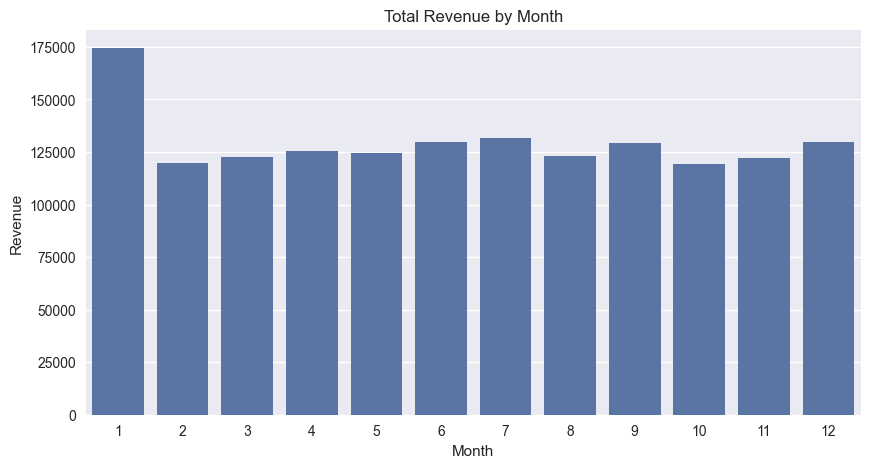

In [54]:
#Revenue by Month
monthly_rev = df.groupby('Month')['Total Spent'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_rev.index, y=monthly_rev.values)
plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


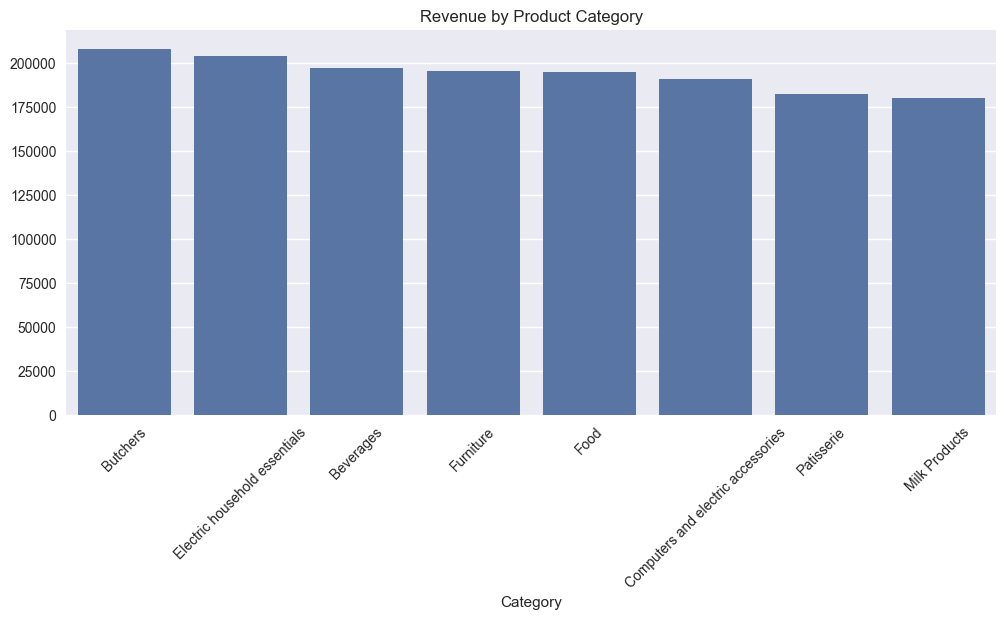

In [55]:
# Revenue by Product Category
cat_rev = df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=cat_rev.index, y=cat_rev.values)
plt.xticks(rotation=45)
plt.title("Revenue by Product Category")
plt.show()


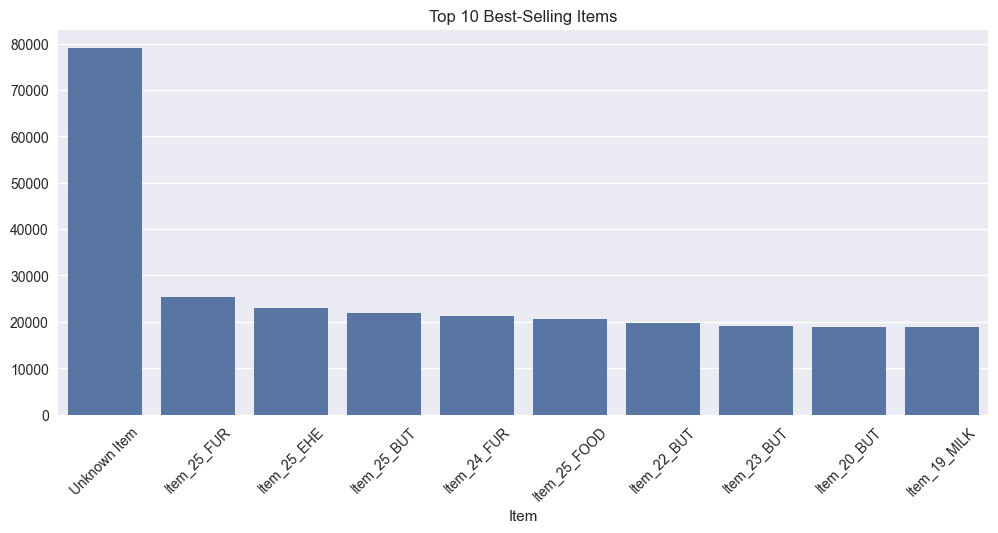

In [57]:
# Top 10 Items by Revenue
item_rev = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=item_rev.index, y=item_rev.values)
plt.xticks(rotation=45)
plt.title("Top 10 Best-Selling Items")
plt.show()


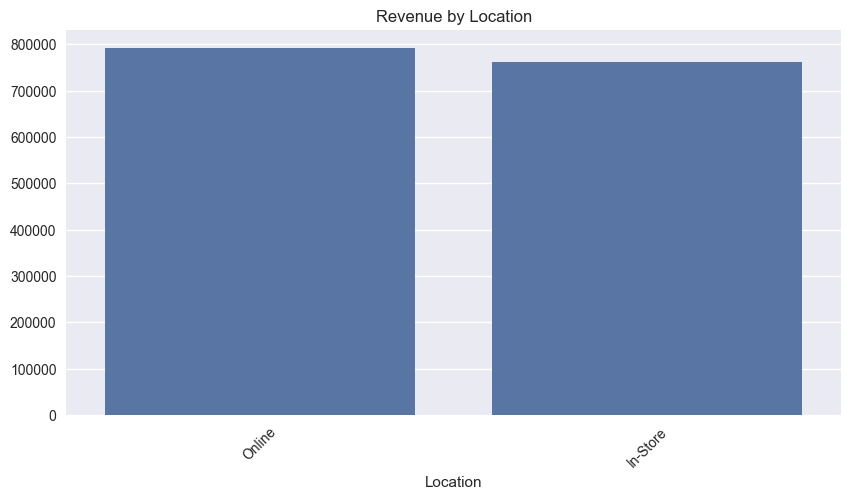

In [ ]:
#Revenue by Location
loc_rev = df.groupby('Location')['Total Spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=loc_rev.index, y=loc_rev.values)
plt.xticks(rotation=45)
plt.title("Revenue by Location")
plt.show()


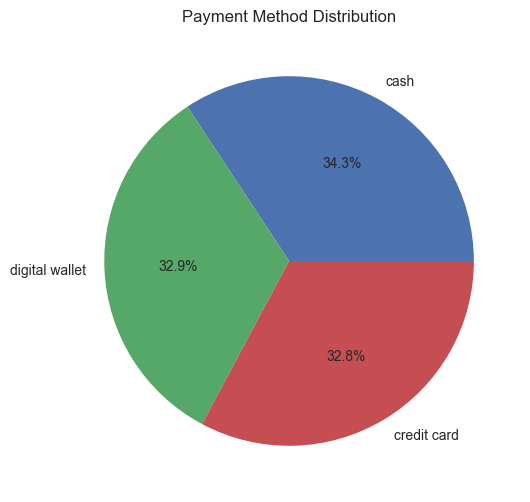

In [59]:
# Payment Method Distribution
plt.figure(figsize=(6,6))
df['Payment Method'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()


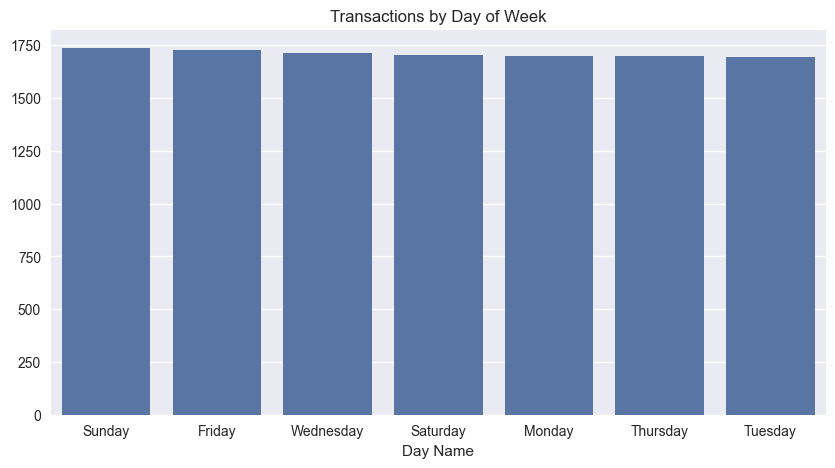

In [60]:
# Transactions by Day of Week
dow = df['Day Name'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=dow.index, y=dow.values)
plt.title("Transactions by Day of Week")
plt.show()


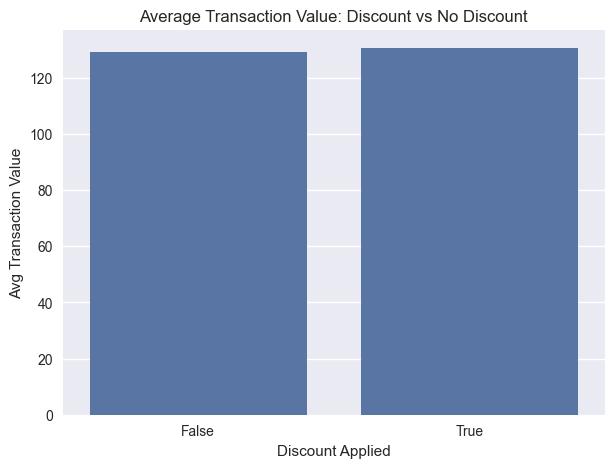

In [61]:
# Discount Impact: Average Revenue With vs Without Discount
disc_rev = df.groupby('Discount Applied')['Total Spent'].mean()

plt.figure(figsize=(7,5))
sns.barplot(x=disc_rev.index.astype(str), y=disc_rev.values)
plt.title("Average Transaction Value: Discount vs No Discount")
plt.xlabel("Discount Applied")
plt.ylabel("Avg Transaction Value")
plt.show()


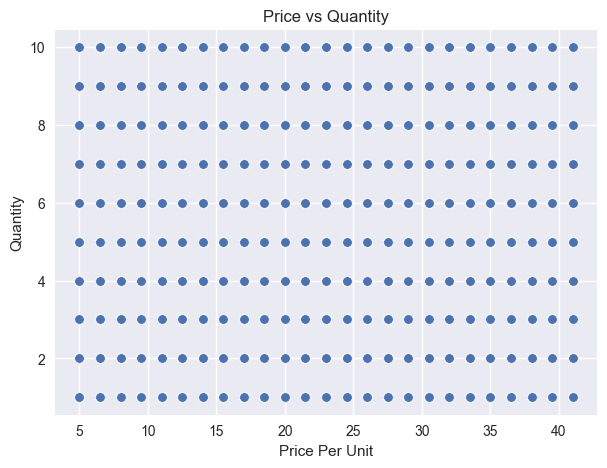

In [62]:
# Price vs Quantity Scatter Plot
plt.figure(figsize=(7,5))
sns.scatterplot(x='Price Per Unit', y='Quantity', data=df)
plt.title("Price vs Quantity")
plt.show()
